# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [137]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [138]:
# define a function to calculate the mean lifetime from the half life
def meanLifetime(halfLife):
    return halfLife/numpy.log(2)
T_HALF = 20.8
TAU = meanLifetime(T_HALF)


Check your average lifetime:

In [139]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [140]:
def f_rad(N, t):
    return -N/TAU

Make sure your function works:

In [141]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [142]:
def analytic(N0, t):
    return N0*numpy.exp(-t/TAU)

Check your answer for a single time:

In [143]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [144]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [145]:
def solve_euler(f, n0, t0, dt, n_steps):
    N=[]
    N.append(n0)
    t=t0
    for i in range (0,n_steps):
        N.append(N[i] +(f(N[i],t)*dt))
        t=t+dt
    return N


Try your solution:

In [146]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [147]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [148]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [149]:
def solve_RK4(f, n0, t0, dt, nsteps):
    N=[]
    N.append(n0)
    t=t0
    k=0
    for i in range (0,nsteps):
        k1=f(N[i],t)
        t=t+(dt/2)
        k2=f(N[i]+k1*dt/2,t)
        k3=f(N[i]+(k2*dt/2),t)
        t=t+(dt/2)
        k4=f(N[i]+k3*dt,t)
        k= (k1+2*k2+2*k3+k4)/6
        N.append(N[i] + k*dt)
       
    return N


In [150]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [151]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [152]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


7166.278728326351
7165.972033130385
7165.9577291542355
7165.955432711035
7165.954820173048
7165.954603403782
7165.954511415911
7165.954467096316
7165.954443640788
7165.954430295767
7165.9544222537625
7165.954417175232
7165.954413841073
7165.954411579185
7165.954410001114
7165.954408873112
7165.954408049559
7165.954407436963
7165.954406973678
7165.954406618078
7165.954406341483
7165.95440612373
7165.954405950416
7165.954405811092
7165.954405698064
7165.954405605591
7165.954405529346
7165.954405466029
7165.954405413099
7165.954405368578
7165.954405330909
7165.954405298865
7165.954405271468
7165.954405247932
7165.954405227623
7165.954405210022
7165.954405194709
7165.954405181341
7165.954405169621
7165.9544051593075
7165.95440515022
7165.954405142167
7165.954405135028
7165.954405128674
7165.954405122995
7165.954405117922
7165.954405113373
7165.954405109275
7165.954405105587
7165.954405102261
7165.954405099251
7165.9544050965205
7165.954405094044
7165.954405091787
7165.954405089734
7165.954

7165.95440506276
7165.954405062792
7165.954405062797
7165.954405062751
7165.95440506279
7165.9544050627655
7165.954405062783
7165.954405062776
7165.954405062773
7165.954405062777
7165.954405062791
7165.9544050627865
7165.954405062782
7165.954405062771
7165.954405062772
7165.954405062782
7165.954405062788
7165.9544050627765
7165.954405062776
7165.95440506278
7165.954405062781
7165.95440506279
7165.954405062793
7165.95440506277
7165.954405062774
7165.954405062783
7165.95440506279
7165.9544050627865
7165.954405062776
7165.95440506277
7165.954405062758
7165.954405062797
7165.954405062766
7165.954405062767
7165.954405062776
7165.954405062779
7165.9544050627865
7165.954405062798
7165.954405062781
7165.954405062773
7165.954405062774
7165.954405062795
7165.954405062792
7165.954405062778
7165.954405062794
7165.954405062778
7165.9544050627865
7165.954405062768
7165.954405062783
7165.95440506279
7165.954405062781
7165.954405062789
7165.954405062785
7165.954405062782
7165.9544050627865
7165.954405

7165.954405062778
7165.954405062781
7165.954405062787
7165.954405062774
7165.954405062773
7165.954405062776
7165.954405062775
7165.954405062761
7165.954405062778
7165.954405062786
7165.954405062773
7165.954405062787
7165.954405062771
7165.954405062783


Text(0.5,1,'A graph showing the errors of both the Euler and RK4\nNumerical Methods at time t=10 relative to the\nAnalytical Solution')

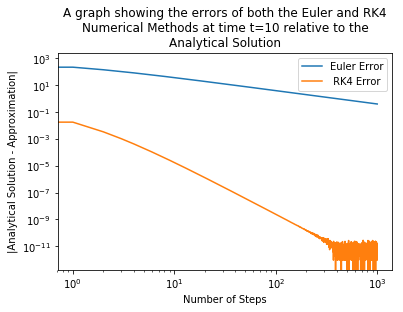

In [156]:
n0=10000
real= n0*numpy.exp(-10/TAU)
def solve_euler2(f, n0, t0, dt, nstep):
    N=n0
    t=t0
    for i in range (0,nstep):
        N=N +(f(N,t)*(100*(dt / nstep)))
        t=t+((100*dt) / nstep)
    return N
def solve_RK42(f, n0, t0, dt, nstep):
    N=n0
    t=t0
    
    for i in range (0,nstep):
        k1=f(N,t)
        t=t+(100*dt/(2*nstep))
        k2=f(N+(k1*50*(dt/nstep)) ,t)
        k3=f(N+(k2*50*(dt/nstep)) ,t)
        t=t+(100*dt/(2*nstep))
        k4=f(N+k3*100*dt/nstep,t)
        k= (k1+2*k2+2*k3+k4)/6
        N=N + k*100*dt/nstep 
    print(N)
    return N
def eulererr():
    erre=[]
    nstep=1
    for i in range (0,1000):
        erre.append(numpy.abs((real - solve_euler2(f_rad, 10000, 0, 0.1, nstep))))
        nstep= nstep + 1
    return erre
def rkerr():
    errr=[]
    nstep=1
    for i in range (0,1000):
        errr.append(numpy.abs((real - solve_RK42(f_rad, 10000, 0, 0.1, nstep))))
        nstep= nstep + 1
    return errr
plt.loglog(numpy.arange(0,1000),eulererr(), label = 'Euler Error')
plt.loglog(numpy.arange(0,1000),rkerr(), label = ' RK4 Error')
plt.legend()
plt.xlabel('Number of Steps')
plt.ylabel('|Analytical Solution - Approximation|')
plt.title("A graph showing the errors of both the Euler and RK4" "\n" "Numerical Methods at time t=10 relative to the" 
          "\n" "Analytical Solution")